In [1]:
import numpy as np
from drawer import *
from data_gen import *
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()
SEED=0

# T1
## define the pinv method function

In [2]:
def pinv_method(data):
    X=data[0]
    y=data[1]    
    X_pinv=np.linalg.pinv(X)
    w=X_pinv@y
    return w

## define the sgd method function

In [3]:
class MSELoss():
    def backward(self,X,y,w,num):
        '''calc the gradient, num is the number of x_n'''
        return 2/num*X.T@(X@w-y)
    def __call__(self,pred,y,num):
        '''calc the loss, num is the number of x_n'''
        return 1/num*np.linalg.norm(pred-y,2)**2

In [4]:
class SGD():
    def __init__(self,learning_rate=0.1):
        self.learning_rate=learning_rate

    # def zero_grad(self):
    #     self.grad[:]=0

    def step(self,w,grad):
        w = w - self.learning_rate*grad
        return w

In [5]:
class Linear_Regression():
    def __init__(self,data,loss_fn,optimizer):
        self.data=(np.hstack((np.ones((data[1].shape[0],1)),data[0])),data[1])
        self.w=np.random.randn(3)
        self.loss_fn=loss_fn
        self.optimizer=optimizer

    def predict(self,X,is_test=True):
        '''测试时做增广, fit里用的话不再做增广(初始化的时候已经做过了)'''
        if is_test:
            X=np.hstack((np.ones((X.shape[0],1)),X))
        return X@self.w

    def validate(self,data):
        X=data[0]
        y=data[1]
        h=np.sign(self.predict(X))
        mistake_indices = np.where(h!=y)[0]
        return (X.shape[0]-len(mistake_indices))/X.shape[0]

    def fit(self,epoch,batch_size):
        loss_history={}
        for _ in range(epoch):
            batch_num=self.data[1].shape[0]//batch_size
            for i in range(batch_num):
                try:
                    batch_data=(self.data[0][i*batch_size:(i+1)*batch_size,:],self.data[1][i*batch_size:(i+1)*batch_size])
                except:
                    batch_data=(self.data[0][i*batch_size:,:],self.data[1][i*batch_size:])
                    batch_size=self.data[1].shape[0]%batch_size
                # print(batch_data)
                pred=self.predict(batch_data[0],is_test=False)
                loss=self.loss_fn(pred,batch_data[1],batch_size)

                # self.optimizer.zero_grad()
                grad=0
                grad=self.loss_fn.backward(batch_data[0],batch_data[1],self.w,batch_size)
                self.w=self.optimizer.step(self.w,grad)
            loss_history[_]=loss
        return loss_history

# T2
## a.generate the data and split

In [6]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)

## b,c,d,e

None pinv train accuracy: 1.0
None pinv test accuracy: 1.0
None sgd train accuracy: 1.0
None sgd test accuracy: 1.0


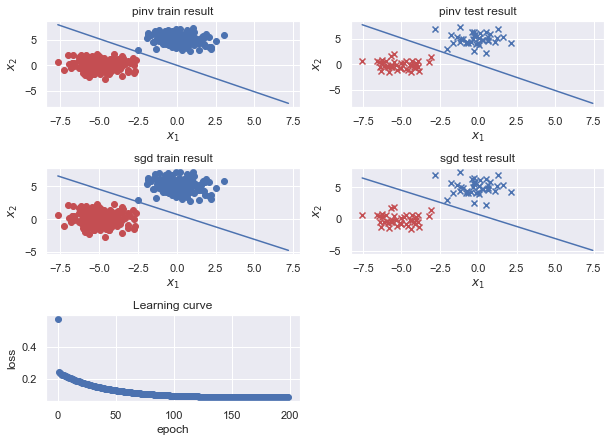

In [7]:
def algorithm(learning_rate=0.01,epoch=200,batch_size=40,fig_title=None):
    # pinv method
    X=X_train
    y=y_train
    X=np.hstack((np.ones((X.shape[0],1)),X))
    data=(X,y)
    w=pinv_method(data)
    h=np.sign(X@w)
    mistake_indices = np.where(h!=y)[0]
    accuracy=(X.shape[0]-len(mistake_indices))/X.shape[0]
    data=(X_train,y_train)
    f=plt.figure(figsize=(10,7))
    ax1=plt.subplot(321)
    draw(data,w,marker='o')
    plt.title('pinv train result')
    print(str(fig_title),'pinv train accuracy:',accuracy)

    X=X_test
    y=y_test
    X=np.hstack((np.ones((X.shape[0],1)),X))
    h=np.sign(X@w)
    mistake_indices = np.where(h!=y)[0]
    accuracy=(X.shape[0]-len(mistake_indices))/X.shape[0]
    data=(X_test,y_test)
    ax2=plt.subplot(322)
    draw(data,w,marker='x')
    plt.title('pinv test result')
    print(str(fig_title),'pinv test accuracy:',accuracy)

    # sgd method
    loss_fn=MSELoss()
    optimizer=SGD(learning_rate=learning_rate)
    model=Linear_Regression((X_train,y_train),loss_fn,optimizer)
    loss_history=model.fit(epoch,batch_size)

    data=(X_train,y_train)
    ax3=plt.subplot(323)
    draw(data,model.w,marker='o')
    plt.title('sgd train result')
    print(str(fig_title),'sgd train accuracy:',model.validate(data))

    data=(X_test,y_test)
    ax4=plt.subplot(324)
    draw(data,model.w,marker='x')
    plt.title('sgd test result')
    print(str(fig_title),'sgd test accuracy:',model.validate(data))

    # learning curve
    plt.subplot(3,2,5)
    ax5=plt.scatter(x=loss_history.keys(),y=loss_history.values())
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Learning curve')
    plt.subplots_adjust(hspace=0.7)
    f.suptitle(fig_title)

algorithm()

# T3
## a.generate the data and split

In [8]:
data=data_generator([1,0],np.eye(2),[0,1],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)

## b,c,d,e

None pinv train accuracy: 0.746875
None pinv test accuracy: 0.8125
None sgd train accuracy: 0.74375
None sgd test accuracy: 0.8125


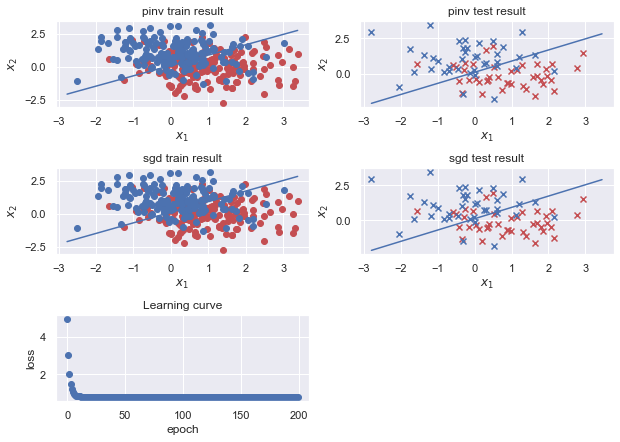

In [9]:
algorithm()

# T4

In [10]:
### 测试样本数量影响

200 samples pinv train accuracy: 0.825
200 samples pinv test accuracy: 0.9
200 samples sgd train accuracy: 0.85
200 samples sgd test accuracy: 0.9


400 samples pinv train accuracy: 0.8875
400 samples pinv test accuracy: 0.85
400 samples sgd train accuracy: 0.8875
400 samples sgd test accuracy: 0.85


600 samples pinv train accuracy: 0.875
600 samples pinv test accuracy: 0.875
600 samples sgd train accuracy: 0.875
600 samples sgd test accuracy: 0.875




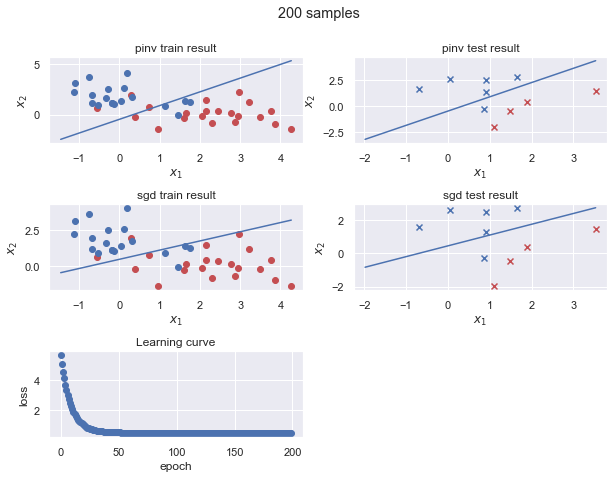

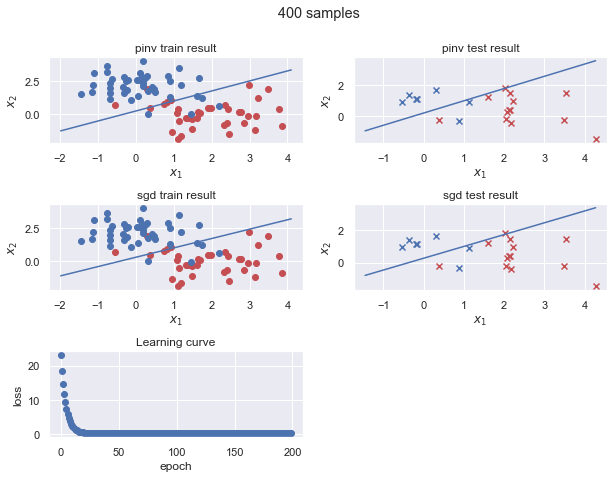

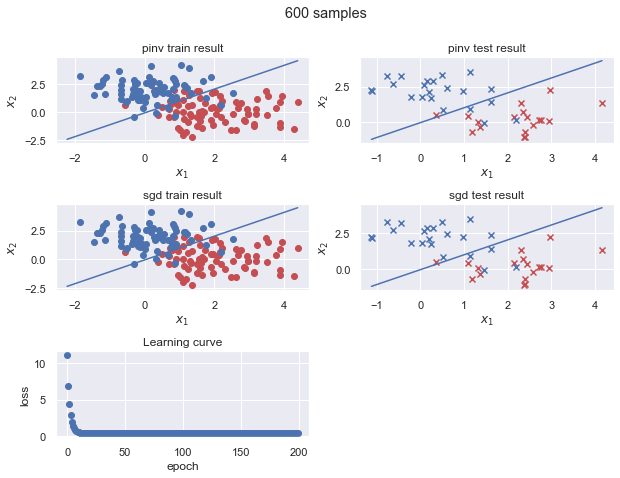

In [11]:
data=data_generator([2,0],np.eye(2),[0,2],np.eye(2),50,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='200 samples')
print('\n')

data=data_generator([2,0],np.eye(2),[0,2],np.eye(2),100,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='400 samples')
print('\n')


data=data_generator([2,0],np.eye(2),[0,2],np.eye(2),200,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='600 samples')
print('\n')

### 结论
 可以看出, 两种算法的性能都与数据本身是否线性可分有较大的关系, 在数据本身线性不可分时, 单纯的增多样本数量对模型效果难有提升, 甚至会因为离群值的增多而使得非线性程度增大, 模型效果更加下降

## 测试样本分布的影响

cov matrix both are I pinv train accuracy: 0.96875
cov matrix both are I pinv test accuracy: 0.975
cov matrix both are I sgd train accuracy: 0.96875
cov matrix both are I sgd test accuracy: 0.975


cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]] pinv train accuracy: 1.0
cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]] pinv test accuracy: 1.0
cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]] sgd train accuracy: 1.0
cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]] sgd test accuracy: 1.0


cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]] pinv train accuracy: 0.965625
cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]] pinv test accuracy: 0.9375
cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]] sgd train accuracy: 0.965625
cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]] sgd test accuracy: 0.9375




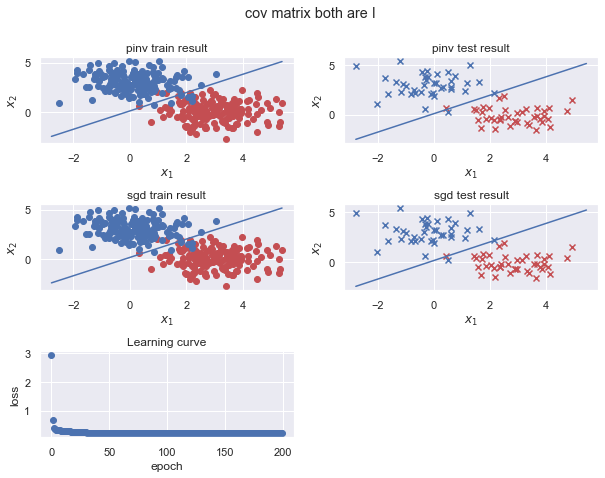

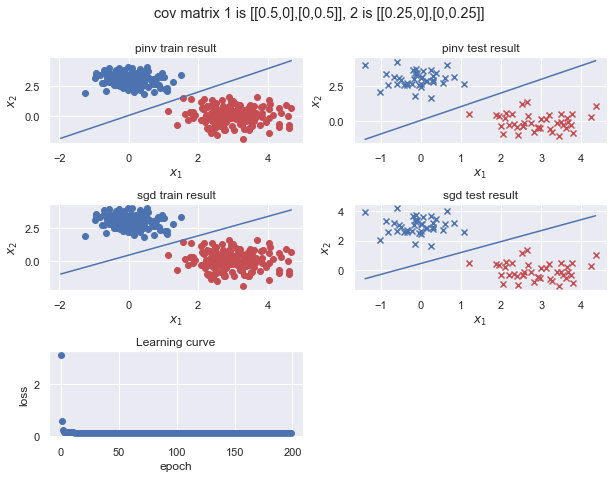

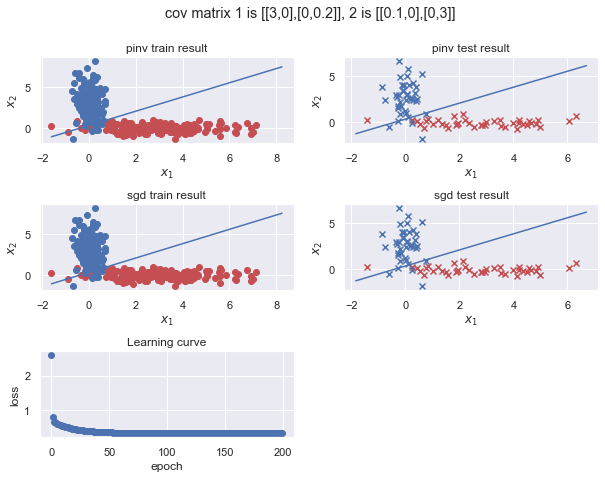

In [12]:
data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='cov matrix both are I')
print('\n')

data=data_generator([3,0],[[0.5,0],[0,0.5]],[0,3],[[0.25,0],[0,0.25]],400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]]')
print('\n')


data=data_generator([3,0],[[3,0],[0,0.2]],[0,3],[[0.1,0],[0,3]],400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]]')
print('\n')

### 结论
 可以看出, 线性回归的两种算法受数据分布情况的影响并不是很大, 只要数据本身是线性可分的, 那么便可以具有较好的结果

## batch size影响

batch size: 10 pinv train accuracy: 0.96875
batch size: 10 pinv test accuracy: 0.975
batch size: 10 sgd train accuracy: 0.96875
batch size: 10 sgd test accuracy: 0.975


batch size: 40 pinv train accuracy: 0.96875
batch size: 40 pinv test accuracy: 0.975
batch size: 40 sgd train accuracy: 0.96875
batch size: 40 sgd test accuracy: 0.975


batch size: 70 pinv train accuracy: 0.96875
batch size: 70 pinv test accuracy: 0.975
batch size: 70 sgd train accuracy: 0.971875
batch size: 70 sgd test accuracy: 0.9875




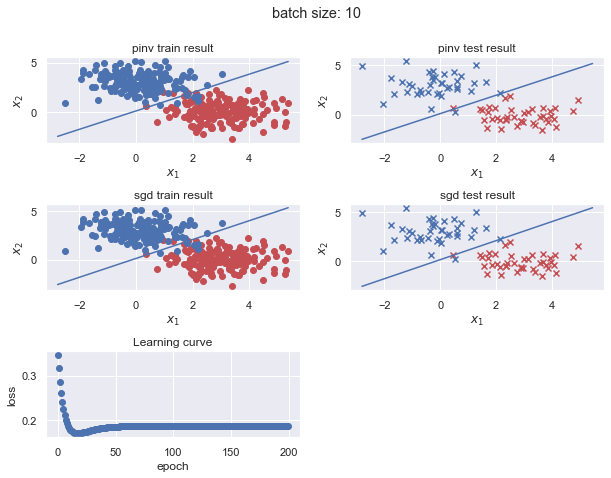

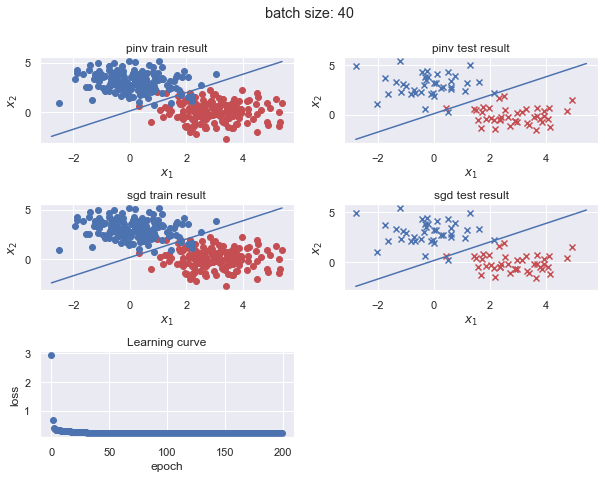

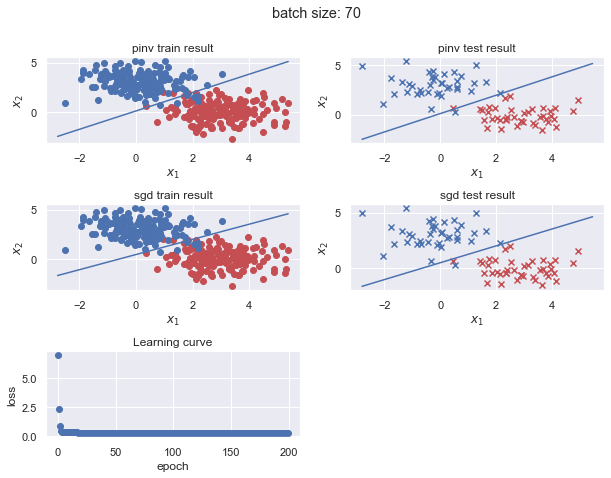

In [13]:
data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='batch size: 10',batch_size=10)
print('\n')

data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='batch size: 40',batch_size=40)
print('\n')


data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='batch size: 70',batch_size=70)
print('\n')

### 结论
 可以看出, 较大的batch size loss函数下降的也相应更加平滑一些, 较小的batch size则随机性较大, 有时还会跳出最优解点

## epoch影响

100 epoch pinv train accuracy: 0.96875
100 epoch pinv test accuracy: 0.975
100 epoch sgd train accuracy: 0.971875
100 epoch sgd test accuracy: 0.9875


300 epoch pinv train accuracy: 0.96875
300 epoch pinv test accuracy: 0.975
300 epoch sgd train accuracy: 0.96875
300 epoch sgd test accuracy: 0.975


500 epoch pinv train accuracy: 0.96875
500 epoch pinv test accuracy: 0.975
500 epoch sgd train accuracy: 0.96875
500 epoch sgd test accuracy: 0.975




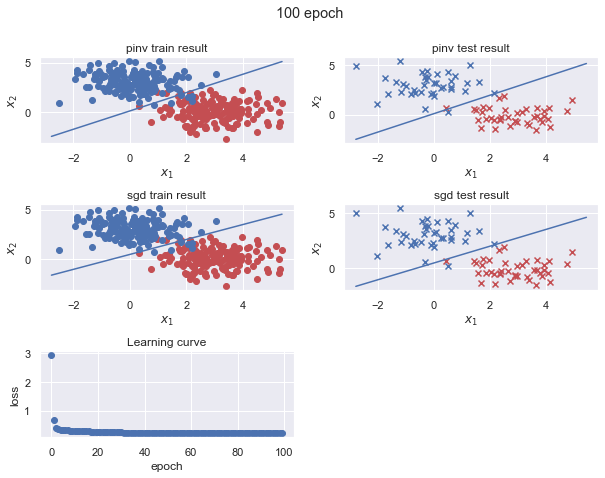

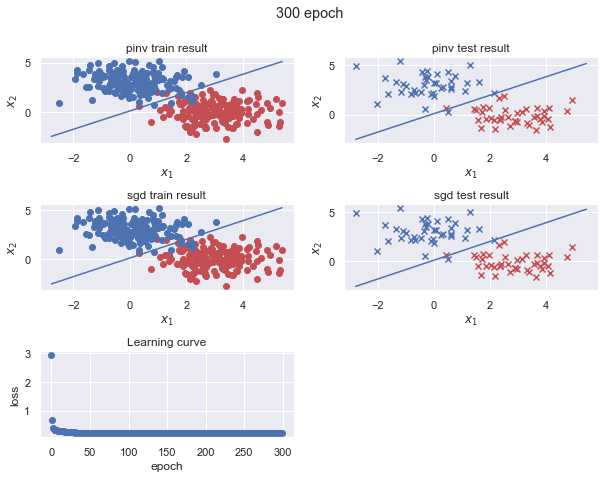

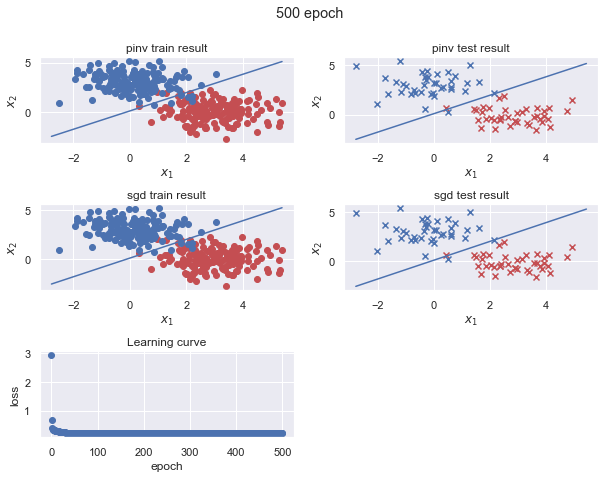

In [14]:
data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='100 epoch',epoch=100)
print('\n')

data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='300 epoch',epoch=300)
print('\n')

data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='500 epoch',epoch=500)
print('\n')

### 结论
 可以看出, 更多的epoch迭代次数并不一定会使得模型的性能提升, 可以考虑引入early stopping机制

# T5

In [15]:
class Adagrad():
    def __init__(self,learning_rate=0.4,epsilon=1e-6):
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.grad_history=[]
        self.t=0

    def step(self,w,grad):
        self.grad_history.append(grad)
        sigma=self.epsilon+np.sqrt(1/(self.t+1)*np.sum(np.array(self.grad_history)**2))
        self.t+=1
        return w-self.learning_rate/sigma*grad

class RMSProp():
    def __init__(self,learning_rate=0.4,alpha=0.9):
        self.learning_rate=learning_rate
        self.prev=0
        self.alpha=0.9

    def step(self,w,grad):
        sigma=np.sqrt(self.alpha*self.prev**2+(1-self.alpha)*grad**2)
        self.prev=sigma
        return w-self.learning_rate/sigma*grad

class Momentum():
    def __init__(self,learning_rate=0.4,lambda_=0.9):
        self.learning_rate=learning_rate
        self.prev=0
        self.lambda_=lambda_
    def step(self,w,grad):
        m = self.lambda_*self.prev - self.learning_rate*grad
        self.prev=m
        return w + m

class Adam():
    def __init__(self,learning_rate=0.4,beta1=0.9,beta2=0.999,epsilon=1e-6):
        self.learning_rate=learning_rate
        self.beta1=beta1
        self.beta2=beta2
        self.epsilon=epsilon
        self.prev_m=0.0
        self.prev_v=0.0
        self.t=0

    def step(self,w,grad):
        self.t+=1
        m = self.beta1*self.prev_m + (1-self.beta1)*grad
        v = self.beta2*self.prev_v + (1-self.beta2)*grad**2
        hat_m = m/(1-self.beta1**self.t)
        hat_v = v/(1-self.beta2**self.t)
        self.prev_m=m
        self.prev_v=v
        return w - self.learning_rate*hat_m/(hat_v+self.epsilon)

In [16]:
class F():
    def __call__(self,x):
        return x*np.cos(0.25*np.pi*x)
    def backward(self,x):
        return np.cos(np.pi/4*x)-np.pi/4*x*np.sin(np.pi*x/4)
    
def gradient_descent(f,x0,optimizer,epoch=10):
    f_history={}
    x=x0
    for _ in range(epoch):
        loss=f(x)
        f_history[x]=loss

        # optimizer.zero_grad()
        grad=0
        grad=f.backward(x)
        x=optimizer.step(x,grad)
    return f_history

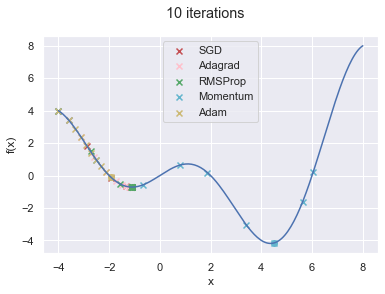

In [17]:
optimizer=SGD(learning_rate=0.4)
f=F()
f_history=gradient_descent(f,-4,optimizer)
x=np.linspace(-4,8,200)
y=f(x)
plt.plot(x,y)
ax=plt.gca()
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='r',label='SGD')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='r')


optimizer=Adagrad()
f_history=gradient_descent(f,-4,optimizer)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='pink',label='Adagrad')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='pink')

optimizer=RMSProp()
f_history=gradient_descent(f,-4,optimizer)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='g',label='RMSProp')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='g')

optimizer=Momentum()
f_history=gradient_descent(f,-4,optimizer)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='c',label='Momentum')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='c')

optimizer=Adam()
f_history=gradient_descent(f,-4,optimizer)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='y',label='Adam')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='y')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.suptitle('10 iterations')
plt.legend()

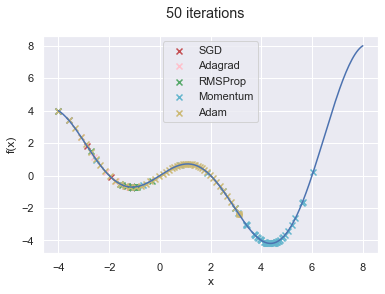

In [18]:
optimizer=SGD(learning_rate=0.4)
f=F()
f_history=gradient_descent(f,-4,optimizer,epoch=50)
x=np.linspace(-4,8,200)
y=f(x)
plt.plot(x,y)
ax=plt.gca()
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='r',label='SGD')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='r')

optimizer=Adagrad()
f_history=gradient_descent(f,-4,optimizer,epoch=50)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='pink',label='Adagrad')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='pink')

optimizer=RMSProp()
f_history=gradient_descent(f,-4,optimizer,epoch=50)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='g',label='RMSProp')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='g')

optimizer=Momentum()
f_history=gradient_descent(f,-4,optimizer,epoch=50)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='c',label='Momentum')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='c')

optimizer=Adam(beta1=0.99)
f_history=gradient_descent(f,-4,optimizer,epoch=50)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='y',label='Adam')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='y')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.suptitle('50 iterations')
plt.legend()

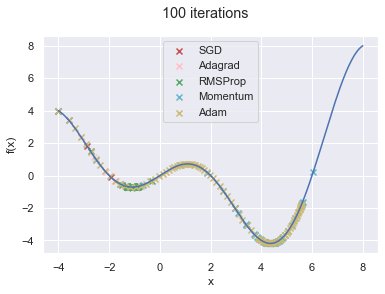

In [19]:
optimizer=SGD(learning_rate=0.4)
f=F()
f_history=gradient_descent(f,-4,optimizer,epoch=100)
x=np.linspace(-4,8,200)
y=f(x)
plt.plot(x,y)
ax=plt.gca()
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='r',label='SGD')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='r')

optimizer=Adagrad()
f_history=gradient_descent(f,-4,optimizer,epoch=100)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='pink',label='Adagrad')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='pink')

optimizer=RMSProp()
f_history=gradient_descent(f,-4,optimizer,epoch=100)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='g',label='RMSProp')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='g')

optimizer=Momentum()
f_history=gradient_descent(f,-4,optimizer,epoch=100)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='c',label='Momentum')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='c')

optimizer=Adam(beta1=0.99)
f_history=gradient_descent(f,-4,optimizer,epoch=100)
ax.scatter(f_history.keys(),f_history.values(),marker='x',color='y',label='Adam')
ax.scatter(list(f_history.keys())[-1],list(f_history.values())[-1],marker='o',color='y')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.suptitle('100 iterations')
plt.legend()

## 结论
 可以看出在此种参数配置下, 动量法能最快到达全局最优点, 而SGD,RMSProp与Adagrad都无法跳出局部最优点, Adam则较为收敛较慢, 但也能跳出局部最优点, 而考虑到动量法可能运动过于剧烈(摆动过大)而又跳出全局最优点, 所以综合来看, 还是Adam比较好